In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/HLCV 19/Project/')
!ls
#!tar -xvf REMBRANDT_Annotated.tar.gz

Backup_Initial	 REMBRANDT_Annotated	     test_losses.png
Project_HLCV_18  REMBRANDT_Annotated.tar.gz  train_losses.png
Project_HLCV_19  Rembrand.tar.gz


In [0]:
!pip3 uninstall tensorflow
!pip3 uninstall tensorflow-gpu
#!pip3 install tensorflow==2.0.0a0
#!pip3 install tensorflow-gpu==2.0.0a0

#!pip3 install --upgrade tensorflow
#!pip3 install --upgrade tensorflow-gpu
#!pip3 uninstall tensorflow
#!pip3 uninstall tensorflow-gpu
!pip3 install tensorflow==1.14.0rc1
!pip3 install tensorflow-gpu==1.14.0rc1
!python3 -c 'import tensorflow as tf; print(tf.__version__)'


Uninstalling tensorflow-1.14.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.14.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.14.0
     |████████████████████████████████| 109.2MB 441kB/s 
     |████████████████████████████████| 3.2MB 34.9MB/s 
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
     |████████████████████████████████| 377.0MB 86kB/s 
1.14.0-rc1


In [0]:
!pip show tensorflow
#!pip clean --all

!pip3 uninstall tensorlayer
!pip3 install tensorlayer==1.11.0rc0
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu

Name: tensorflow
Version: 1.14.0rc1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: grpcio, astor, termcolor, protobuf, google-pasta, gast, tensorflow-estimator, tensorboard, absl-py, wrapt, keras-applications, wheel, keras-preprocessing, numpy, six
Required-by: stable-baselines, magenta, fancyimpute
     |████████████████████████████████| 317kB 3.4MB/s 
     |████████████████████████████████| 13.9MB 54.6MB/s 
     |████████████████████████████████| 25.4MB 37.8MB/s 
     |████████████████████████████████| 92kB 27.9MB/s 
     |████████████████████████████████| 5.4MB 31.6MB/s 
     |████████████████████████████████| 51kB 25.8MB/s 
     |████████████████████████████████| 31.2MB 36.9MB/s 
     |████████████████████████████████| 61kB 27.7MB/s 
     |████████████████████████████████| 143k

In [0]:
import tensorflow as tf
import tensorlayer as tl
from tensorlayer.layers import *
import numpy as np
#from tensorflow.layers import *


from tensorlayer.layers import *
def u_net(x, is_train=False, reuse=False, n_out=1):
    _, nx, ny, nz = x.get_shape().as_list()
    with tf.variable_scope("u_net", reuse=reuse):
        tl.layers.set_name_reuse(reuse)
        inputs = InputLayer(x, name='inputs')
        #inputs = InputLayer(x)
        conv1 = Conv2d(inputs, 64, (3, 3), act=tf.nn.relu, name='conv1_1')
        conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='conv1_2')
        pool1 = MaxPool2d(conv1, (2, 2), name='pool1')
        conv2 = Conv2d(pool1, 128, (3, 3), act=tf.nn.relu, name='conv2_1')
        conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='conv2_2')
        pool2 = MaxPool2d(conv2, (2, 2), name='pool2')
        conv3 = Conv2d(pool2, 256, (3, 3), act=tf.nn.relu, name='conv3_1')
        conv3 = Conv2d(conv3, 256, (3, 3), act=tf.nn.relu, name='conv3_2')
        pool3 = MaxPool2d(conv3, (2, 2), name='pool3')
        conv4 = Conv2d(pool3, 512, (3, 3), act=tf.nn.relu, name='conv4_1')
        conv4 = Conv2d(conv4, 512, (3, 3), act=tf.nn.relu, name='conv4_2')
        pool4 = MaxPool2d(conv4, (2, 2), name='pool4')
        conv5 = Conv2d(pool4, 1024, (3, 3), act=tf.nn.relu, name='conv5_1')
        conv5 = Conv2d(conv5, 1024, (3, 3), act=tf.nn.relu, name='conv5_2')
        #conv5 = tf.identity(conv5,name="conv_5")

        up4 = DeConv2d(conv5, 512, (3, 3), strides=(2, 2), name='deconv4')
        up4 = ConcatLayer([up4, conv4], 3, name='concat4')
        conv4 = Conv2d(up4, 512, (3, 3), act=tf.nn.relu, name='uconv4_1')
        conv4 = Conv2d(conv4, 512, (3, 3), act=tf.nn.relu, name='uconv4_2')
        up3 = DeConv2d(conv4, 256, (3, 3), strides=(2, 2), name='deconv3')
        up3 = ConcatLayer([up3, conv3], 3, name='concat3')
        conv3 = Conv2d(up3, 256, (3, 3), act=tf.nn.relu, name='uconv3_1')
        conv3 = Conv2d(conv3, 256, (3, 3), act=tf.nn.relu, name='uconv3_2')
        up2 = DeConv2d(conv3, 128, (3, 3), strides=(2, 2), name='deconv2')
        up2 = ConcatLayer([up2, conv2], 3, name='concat2')
        conv2 = Conv2d(up2, 128, (3, 3), act=tf.nn.relu,  name='uconv2_1')
        conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='uconv2_2')
        up1 = DeConv2d(conv2, 64, (3, 3), strides=(2, 2), name='deconv1')
        up1 = ConcatLayer([up1, conv1] , 3, name='concat1')
        conv1 = Conv2d(up1, 64, (3, 3), act=tf.nn.relu, name='uconv1_1')
        conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='uconv1_2')
        conv1 = Conv2d(conv1, n_out, (1, 1), act=tf.nn.sigmoid, name='uconv1')
    return conv1
  
def u_net_test(x, is_train=False, reuse=False, n_out=1):
    _, nx, ny, nz = x.get_shape().as_list()
    with tf.variable_scope("u_net", reuse=reuse):
        tl.layers.set_name_reuse(reuse)
        inputs = InputLayer(x, name='inputs')
        #inputs = InputLayer(x)
        conv1 = Conv2d(inputs, 64, (3, 3), act=tf.nn.relu, name='conv1_1')
        conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='conv1_2')
        pool1 = MaxPool2d(conv1, (2, 2), name='pool1')
        conv2 = Conv2d(pool1, 128, (3, 3), act=tf.nn.relu, name='conv2_1')
        conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='conv2_2')
        pool2 = MaxPool2d(conv2, (2, 2), name='pool2')
        conv3 = Conv2d(pool2, 256, (3, 3), act=tf.nn.relu, name='conv3_1')
        conv3 = Conv2d(conv3, 256, (3, 3), act=tf.nn.relu, name='conv3_2')
        pool3 = MaxPool2d(conv3, (2, 2), name='pool3')
        conv4 = Conv2d(pool3, 512, (3, 3), act=tf.nn.relu, name='conv4_1')
        conv4 = Conv2d(conv4, 512, (3, 3), act=tf.nn.relu, name='conv4_2')
        pool4 = MaxPool2d(conv4, (2, 2), name='pool4')
        conv5 = Conv2d(pool4, 1024, (3, 3), act=tf.nn.relu, name='conv5_1')
        conv5 = Conv2d(conv5, 1024, (3, 3), act=tf.nn.relu, name='conv5_2')

        up4 = DeConv2d(conv5, 512, (3, 3), strides=(2, 2), name='deconv4')
        up4 = ConcatLayer([up4, conv4], 3, name='concat4')
        conv4 = Conv2d(up4, 512, (3, 3), act=tf.nn.relu, name='uconv4_1')
        conv4 = Conv2d(conv4, 512, (3, 3), act=tf.nn.relu, name='uconv4_2')
        up3 = DeConv2d(conv4, 256, (3, 3), strides=(2, 2), name='deconv3')
        up3 = ConcatLayer([up3, conv3], 3, name='concat3')
        conv3 = Conv2d(up3, 256, (3, 3), act=tf.nn.relu, name='uconv3_1')
        conv3 = Conv2d(conv3, 256, (3, 3), act=tf.nn.relu, name='uconv3_2')
        up2 = DeConv2d(conv3, 128, (3, 3), strides=(2, 2), name='deconv2')
        up2 = ConcatLayer([up2, conv2], 3, name='concat2')
        conv2 = Conv2d(up2, 128, (3, 3), act=tf.nn.relu,  name='uconv2_1')
        conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='uconv2_2')
        up1 = DeConv2d(conv2, 64, (3, 3), strides=(2, 2), name='deconv1')
        up1 = ConcatLayer([up1, conv1] , 3, name='concat1')
        conv1 = Conv2d(up1, 64, (3, 3), act=tf.nn.relu, name='uconv1_1')
        conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='uconv1_2')
        conv1 = Conv2d(conv1, n_out, (1, 1), act=tf.nn.sigmoid, name='uconv1')
    return conv5

def u_net_bn(x, is_train=False, reuse=False, batch_size=None, pad='SAME', n_out=1):
    """image to image translation via conditional adversarial learning"""
    nx = int(x._shape[1])
    ny = int(x._shape[2])
    nz = int(x._shape[3])
    print(" * Input: size of image: %d %d %d" % (nx, ny, nz))

    w_init = tf.truncated_normal_initializer(stddev=0.01)
    b_init = tf.constant_initializer(value=0.0)
    gamma_init=tf.random_normal_initializer(1., 0.02)
    with tf.variable_scope("u_net", reuse=reuse):
        tl.layers.set_name_reuse(reuse)
        inputs = InputLayer(x, name='inputs')

        conv1 = Conv2d(inputs, 64, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv1')
        conv2 = Conv2d(conv1, 128, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv2')
        conv2 = BatchNormLayer(conv2, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn2')

        conv3 = Conv2d(conv2, 256, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv3')
        conv3 = BatchNormLayer(conv3, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn3')

        conv4 = Conv2d(conv3, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv4')
        conv4 = BatchNormLayer(conv4, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn4')

        conv5 = Conv2d(conv4, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv5')
        conv5 = BatchNormLayer(conv5, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn5')

        conv6 = Conv2d(conv5, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv6')
        conv6 = BatchNormLayer(conv6, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn6')

        conv7 = Conv2d(conv6, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv7')
        conv7 = BatchNormLayer(conv7, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn7')

        conv8 = Conv2d(conv7, 512, (4, 4), (2, 2), act=lambda x: tl.act.lrelu(x, 0.2), padding=pad, W_init=w_init, b_init=b_init, name='conv8')
        print(" * After conv: %s" % conv8.outputs)
        # exit()
        # print(nx/8)
        up7 = DeConv2d(conv8, 512, (4, 4), out_size=(2, 2), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv7')
        up7 = BatchNormLayer(up7, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn7')

        # print(up6.outputs)
        up6 = ConcatLayer([up7, conv7], concat_dim=3, name='concat6')
        up6 = DeConv2d(up6, 1024, (4, 4), out_size=(4, 4), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv6')
        up6 = BatchNormLayer(up6, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn6')
        # print(up6.outputs)
        # exit()

        up5 = ConcatLayer([up6, conv6], concat_dim=3, name='concat5')
        up5 = DeConv2d(up5, 1024, (4, 4), out_size=(8, 8), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv5')
        up5 = BatchNormLayer(up5, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn5')
        # print(up5.outputs)
        # exit()

        up4 = ConcatLayer([up5, conv5] ,concat_dim=3, name='concat4')
        up4 = DeConv2d(up4, 1024, (4, 4), out_size=(15, 15), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv4')
        up4 = BatchNormLayer(up4, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn4')

        up3 = ConcatLayer([up4, conv4] ,concat_dim=3, name='concat3')
        up3 = DeConv2d(up3, 256, (4, 4), out_size=(30, 30), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv3')
        up3 = BatchNormLayer(up3, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn3')

        up2 = ConcatLayer([up3, conv3] ,concat_dim=3, name='concat2')
        up2 = DeConv2d(up2, 128, (4, 4), out_size=(60, 60), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv2')
        up2 = BatchNormLayer(up2, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn2')

        up1 = ConcatLayer([up2, conv2] ,concat_dim=3, name='concat1')
        up1 = DeConv2d(up1, 64, (4, 4), out_size=(120, 120), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv1')
        up1 = BatchNormLayer(up1, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn1')

        up0 = ConcatLayer([up1, conv1] ,concat_dim=3, name='concat0')
        up0 = DeConv2d(up0, 64, (4, 4), out_size=(240, 240), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv0')
        up0 = BatchNormLayer(up0, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn0')
        # print(up0.outputs)
        # exit()

        out = Conv2d(up0, n_out, (1, 1), act=tf.nn.sigmoid, name='out')

        print(" * Output: %s" % out.outputs)
        # exit()

    return out

W0721 16:37:40.813894 139831078553472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/core.py:39: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0721 16:37:40.830850 139831078553472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/pooling.py:66: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
import tensorlayer as tl
import numpy as np
import os, csv, random, gc, pickle
import nibabel as nib
import sys

"""
In seg file
--------------
Label 1: necrotic and non-enhancing tumor
Label 2: edema 
Label 4: enhancing tumor
Label 0: background

MRI
-------
whole/complete tumor: 1 2 4
core: 1 4
enhance: 4
"""
###============================= SETTINGS ===================================###
DATA_SIZE = 'all' # (small, half or all)

save_dir = "Project_HLCV_19/code/train_dev_all/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

HGG_data_path = "REMBRANDT_Annotated/HGG"
LGG_data_path = "REMBRANDT_Annotated/LGG"
survival_csv_path = "REMBRANDT_Annotated/survival_data.csv"
###==========================================================================###

survival_id_list = []
survival_age_list =[]
survival_peroid_list = []

with open(survival_csv_path, 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for idx, content in enumerate(reader):
        survival_id_list.append(content[0])
        survival_age_list.append(float(content[1]))
        survival_peroid_list.append(float(content[2]))

print(len(survival_id_list)) #163

# Remove other options (half and small) for Rembrandt
HGG_path_list = tl.files.load_folder_list(path=HGG_data_path)
LGG_path_list = tl.files.load_folder_list(path=LGG_data_path)
print(len(HGG_path_list), len(LGG_path_list)) #210 #75

HGG_name_list = [os.path.basename(p) for p in HGG_path_list]
LGG_name_list = [os.path.basename(p) for p in LGG_path_list]

survival_id_from_HGG = []
survival_id_from_LGG = []

for i in survival_id_list:
    if i in HGG_name_list:
        survival_id_from_HGG.append(i)
    elif i in LGG_name_list:
        survival_id_from_LGG.append(i)
    else:
        print(i)

print(len(survival_id_from_HGG), len(survival_id_from_LGG)) #61 and 40

# Pick 54 out of 62 and 36 out of 40 (We will have 90 training and 12 test
#index_HGG = list(range(0, len(survival_id_from_HGG)))
#index_LGG = list(range(0, len(LGG_name_list)))
index_HGG = range(len(survival_id_from_HGG))
index_LGG = range(len(survival_id_from_LGG))

# Training and testing split
tr_index_HGG = random.sample(index_HGG, 54)
tr_index_LGG = random.sample(index_LGG, 36)
tr_index_HGG = range(54)
tr_index_LGG = range(36)
dev_index_HGG = [i for i in index_HGG if i not in tr_index_HGG]
dev_index_LGG = [i for i in index_LGG if i not in tr_index_LGG]

# print(tr_index_HGG)
# print(dev_index_HGG)
# print(tr_index_LGG)
# print(dev_index_LGG)

survival_id_dev_HGG = [survival_id_from_HGG[i] for i in dev_index_HGG]
survival_id_tr_HGG = [survival_id_from_HGG[i] for i in tr_index_HGG]

survival_id_dev_LGG = [LGG_name_list[i] for i in dev_index_LGG]
survival_id_tr_LGG = [LGG_name_list[i] for i in tr_index_LGG]

survival_age_dev = [survival_age_list[survival_id_list.index(i)] for i in survival_id_dev_HGG]
survival_age_tr = [survival_age_list[survival_id_list.index(i)] for i in survival_id_tr_HGG]

survival_period_dev = [survival_peroid_list[survival_id_list.index(i)] for i in survival_id_dev_HGG]
survival_period_tr = [survival_peroid_list[survival_id_list.index(i)] for i in survival_id_tr_HGG]

data_types = ['1', '2', '3', '4']
data_types_mean_std_dict = {i: {'mean': 0.0, 'std': 1.0} for i in data_types}

# calculate mean and std for all data types

#==================== LOAD ALL IMAGES' PATH AND COMPUTE MEAN/ STD
for i in data_types:
    data_temp_list = []
    for j in HGG_name_list:
        img_path = os.path.join(HGG_data_path, j, j + '.nii.gz')
        img = nib.load(img_path).get_data()
        if(img.shape[0] == 256):
            print(img.shape)
            print(j)
        data_temp_list.append(img)

    for j in LGG_name_list:
        img_path = os.path.join(LGG_data_path, j, j + '.nii.gz')
        img = nib.load(img_path).get_data()
        if(img.shape[0] == 256):
            print(img.shape)
            print(j)
        data_temp_list.append(img)

    data_temp_list = np.concatenate(data_temp_list, axis = 2)	
    # data_temp_list = np.asarray(data_temp_list)
    m = np.mean(data_temp_list)
    s = np.std(data_temp_list)
    data_types_mean_std_dict[i]['mean'] = m
    data_types_mean_std_dict[i]['std'] = s
del data_temp_list
print(data_types_mean_std_dict)

with open(save_dir + 'mean_std_dict.pickle', 'wb') as f:
    pickle.dump(data_types_mean_std_dict, f, protocol=4)


##==================== GET NORMALIZE IMAGES
X_train_input = []
X_train_target = []

X_dev_input = []
X_dev_target = []


print(" HGG Validation")
for i in survival_id_dev_HGG:
    all_3d_data = []
    for j in data_types:
      
        # img_path = os.path.join(HGG_data_path, i, i + '_' + j + '.nii.gz')
        img_path = os.path.join(HGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)
    #print(all_3d_data[0].shape)
    seg_path = os.path.join(HGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_dev_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        seg_2d.astype(int)
        X_dev_target.append(seg_2d)
    del all_3d_data
    gc.collect()
    print("finished {}".format(i))

print(" LGG Validation")
for i in survival_id_dev_LGG:
    all_3d_data = []
    for j in data_types:
      
        img_path = os.path.join(LGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

    seg_path = os.path.join(LGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_dev_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        seg_2d.astype(int)
        X_dev_target.append(seg_2d)
    del all_3d_data
    gc.collect()
    print("finished {}".format(i))

X_dev_input = np.asarray(X_dev_input, dtype=np.float32)
X_dev_target = np.asarray(X_dev_target)#, dtype=np.float32)

print(" HGG Train")
for i in survival_id_tr_HGG:
    all_3d_data = []
    for j in data_types:
      
        img_path = os.path.join(HGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

    seg_path = os.path.join(HGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_train_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        seg_2d.astype(int)
        X_train_target.append(seg_2d)
    del all_3d_data
    print("finished {}".format(i))


print(" LGG Train")
for i in survival_id_tr_LGG:
    all_3d_data = []
    for j in data_types:
      
        img_path = os.path.join(LGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)
    #print(len(all_3d_data))
    seg_path = os.path.join(LGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    #print(all_3d_data[0].shape[2])
    #print(all_3d_data[0][:, :, 0])
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        #print(combined_array.shape)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        #print(combined_array.shape)
        combined_array.astype(np.float32)
        X_train_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        seg_2d.astype(int)
        X_train_target.append(seg_2d)
    del all_3d_data
    print("finished {}".format(i))

X_train_input = np.asarray(X_train_input, dtype=np.float32)
print(X_train_input.shape)
print(len(X_train_input))
X_train_target = np.asarray(X_train_target)#, dtype=np.float32)


101
61 40
61 40
{'1': {'mean': 42.878201589548354, 'std': 387.6765439917516}, '2': {'mean': 42.878201589548354, 'std': 387.6765439917516}, '3': {'mean': 42.878201589548354, 'std': 387.6765439917516}, '4': {'mean': 42.878201589548354, 'std': 387.6765439917516}}
 HGG Validation
finished HF1560
finished HF1587
finished HF1613
finished HF1628
finished HF1671
finished HF1702
finished HF0652
 LGG Validation
finished HF0920
finished HF1463
finished HF0855
finished HF1235
 HGG Train
finished 900-00-5332
finished 900-00-5308
finished 900-00-5316
finished 900-00-5338
finished 900-00-5339
finished 900-00-5342
finished 900-00-5346
finished 900-00-5381
finished 900-00-5384
finished 900-00-5385
finished 900-00-5393
finished 900-00-5396
finished 900-00-5404
finished 900-00-5413
finished 900-00-5414
finished 900-00-5445
finished 900-00-5459
finished 900-00-5462
finished 900-00-5299
finished 900-00-5303
finished HF0828
finished HF0986
finished HF0990
finished HF1032
finished HF1057
finished HF1058
fini

In [0]:
#! /usr/bin/python
# -*- coding: utf8 -*-

import tensorflow as tf
import tensorlayer as tl
import numpy as np
import os, time
import sys

#tf.compat.v1.disable_eager_execution()
#tf.disable_eager_execution()

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

def distort_imgs(data):
    """ data augumentation """
    x1, x2, x3, x4, y = data
    x1, x2, x3, x4, y = tl.prepro.flip_axis_multi([x1, x2, x3, x4, y],  # previous without this, hard-dice=83.7
                            axis=0, is_random=True) # up down
    x1, x2, x3, x4, y = tl.prepro.flip_axis_multi([x1, x2, x3, x4, y],
                            axis=1, is_random=True) # left right
    x1, x2, x3, x4, y = tl.prepro.elastic_transform_multi([x1, x2, x3, x4, y],
                            alpha=720, sigma=24, is_random=True)
    x1, x2, x3, x4, y = tl.prepro.rotation_multi([x1, x2, x3, x4, y], rg=20,
                            is_random=True, fill_mode='constant') # nearest, constant
    x1, x2, x3, x4, y = tl.prepro.shift_multi([x1, x2, x3, x4, y], wrg=0.10,
                            hrg=0.10, is_random=True, fill_mode='constant')
    x1, x2, x3, x4, y = tl.prepro.shear_multi([x1, x2, x3, x4, y], 0.05,
                            is_random=True, fill_mode='constant')
    x1, x2, x3, x4, y = tl.prepro.zoom_multi([x1, x2, x3, x4, y],
                            zoom_range=[0.9, 1.1], is_random=True,
                            fill_mode='constant')
    return x1, x2, x3, x4, y

def vis_imgs(X, y, path):
    """ show one slice """
    if y.ndim == 2:
        y = y[:,:,np.newaxis]
    assert X.ndim == 3
    tl.vis.save_images(np.asarray([X[:,:,0,np.newaxis],
        X[:,:,1,np.newaxis], X[:,:,2,np.newaxis],
        X[:,:,3,np.newaxis], y]), size=(1, 5),
        image_path=path)

def vis_imgs2(X, y_, y, path):
    """ show one slice with target """
    if y.ndim == 2:
        y = y[:,:,np.newaxis]
    if y_.ndim == 2:
        y_ = y_[:,:,np.newaxis]
    assert X.ndim == 3
    tl.vis.save_images(np.asarray([X[:,:,0,np.newaxis],
        X[:,:,1,np.newaxis], X[:,:,2,np.newaxis],
        X[:,:,3,np.newaxis], y_, y]), size=(1, 6),
        image_path=path)

task='all'
## Create folder to save trained model and result images
save_dir = "Project_HLCV_19/checkpoint"
tl.files.exists_or_mkdir(save_dir)
tl.files.exists_or_mkdir("Project_HLCV_19/code/samples/{}".format(task))

###======================== LOAD DATA ===================================###
## by importing this, you can load a training set and a validation set.
# you will get X_train_input, X_train_target, X_dev_input and X_dev_target
# there are 4 labels in targets:
# Label 0: background
# Label 1: necrotic and non-enhancing tumor
# Label 2: edema
# Label 4: enhancing tumor

X_train = X_train_input
y_train = X_train_target[:,:,:,np.newaxis]
X_test = X_dev_input
y_test = X_dev_target[:,:,:,np.newaxis]

if task == 'all':
    y_train = (y_train > 0).astype(int)
    y_test = (y_test > 0).astype(int)
elif task == 'necrotic':
    y_train = (y_train == 1).astype(int)
    y_test = (y_test == 1).astype(int)
elif task == 'edema':
    y_train = (y_train == 2).astype(int)
    y_test = (y_test == 2).astype(int)
elif task == 'enhance':
    y_train = (y_train == 4).astype(int)
    y_test = (y_test == 4).astype(int)
else:
    exit("Unknow task %s" % task)


###======================== HYPER-PARAMETERS ============================###
batch_size = 10
lr = 0.00001 
# lr_decay = 0.5
# decay_every = 100
beta1 = 0.9
n_epoch = 100
print_freq_step = 100

###======================== SHOW DATA ===================================###
# show one slice
X = np.asarray(X_train[80])
y = np.asarray(y_train[80])
print(X.shape, X.min(), X.max()) # (240, 240, 4) -0.380588 2.62761
print(y.shape, y.min(), y.max()) # (240, 240, 1) 0 1
print(X_train.shape)
print(X_test.shape)
nw, nh, nz = X.shape
vis_imgs(X, y, 'Project_HLCV_19/code/samples/{}/_train_im.png'.format(task))
# show data augumentation results
for i in range(10):
    x_flair, x_t1, x_t1ce, x_t2, label = distort_imgs([X[:,:,0,np.newaxis], X[:,:,1,np.newaxis],
                X[:,:,2,np.newaxis], X[:,:,3,np.newaxis], y])#[:,:,np.newaxis]])
    # print(x_flair.shape, x_t1.shape, x_t1ce.shape, x_t2.shape, label.shape) # (240, 240, 1) (240, 240, 1) (240, 240, 1) (240, 240, 1) (240, 240, 1)
    X_dis = np.concatenate((x_flair, x_t1, x_t1ce, x_t2), axis=2)
    # print(X_dis.shape, X_dis.min(), X_dis.max()) # (240, 240, 4) -0.380588233471 2.62376139209
    vis_imgs(X_dis, label, 'Project_HLCV_19/code/samples/{}/_train_im_aug{}.png'.format(task, i))


with tf.device('/cpu:0'):
    sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
    with tf.device('/gpu:0'): #<- remove it if you train on CPU or other GPU
        ###======================== DEFIINE MODEL =======================###
        ## nz is 4 as we input all Flair, T1, T1c and T2.
        t_image = tf.placeholder('float32', [batch_size, nw, nh, nz], name='input_image')
        ## labels are either 0 or 1
        t_seg = tf.placeholder('float32', [batch_size, nw, nh, 1], name='target_segment')
        ## train inference
        net = u_net(t_image, is_train=True, reuse=False, n_out=1)
        ## test inference
        net_test = u_net(t_image, is_train=False, reuse=True, n_out=1)
        

        ###======================== DEFINE LOSS =========================###
        ## train losses
        out_seg = net.outputs
        dice_loss = 1 - tl.cost.dice_coe(out_seg, t_seg, axis=[0,1,2,3])#, 'jaccard', epsilon=1e-5)
        iou_loss = tl.cost.iou_coe(out_seg, t_seg, axis=[0,1,2,3])
        dice_hard = tl.cost.dice_hard_coe(out_seg, t_seg, axis=[0,1,2,3])
        loss = dice_loss

        ## test losses
        test_out_seg = net_test.outputs
        test_dice_loss = 1 - tl.cost.dice_coe(test_out_seg, t_seg, axis=[0,1,2,3])#, 'jaccard', epsilon=1e-5)
        test_iou_loss = tl.cost.iou_coe(test_out_seg, t_seg, axis=[0,1,2,3])
        test_dice_hard = tl.cost.dice_hard_coe(test_out_seg, t_seg, axis=[0,1,2,3])

    ###======================== DEFINE TRAIN OPTS =======================###
    t_vars = tl.layers.get_variables_with_name('u_net', True, True)
    with tf.device('/gpu:0'):
        with tf.variable_scope('learning_rate'):
            lr_v = tf.Variable(lr, trainable=False)
        train_op = tf.train.AdamOptimizer(lr_v, beta1=beta1).minimize(loss, var_list=t_vars)

    ###======================== LOAD MODEL ==============================###
    tl.layers.initialize_global_variables(sess)
    ## load existing model if possible
    #tl.files.load_and_assign_npz(sess=sess, name=save_dir+'/u_net_{}.npz'.format(task), network=net)
    #temp_model = tl.files.load_npz(path=save_dir+'/', name='u_net_{}.npz'.format(task))
    #print(temp_model)
    


(240, 240, 4) -0.110603034 0.45945984
(240, 240, 1) 0 0
(4545, 240, 240, 4)
(577, 240, 240, 4)


W0721 16:42:18.213984 139831078553472 tl_logging.py:123] WARNING: Function: `tensorlayer.layers.utils.set_name_reuse` (in file: /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/utils.py) is deprecated and will be removed after 2018-06-30.
Instructions for updating: TensorLayer relies on TensorFlow to check name reusing

W0721 16:42:18.215369 139831078553472 tl_logging.py:123] WARNING: this method is DEPRECATED and has no effect, please remove it from your code.
W0721 16:42:18.216480 139831078553472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/core.py:131: The name tf.get_variable_scope is deprecated. Please use tf.compat.v1.get_variable_scope instead.

W0721 16:42:18.562121 139831078553472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/convolution/simplified_conv.py:191: The name tf.layers.Conv2D is deprecated. Please use tf.compat.v1.layers.Conv2D instead.

W0721 16:42:18.757772 13983107

In [0]:
def train(task="all"):
###======================== TRAINING ================================###
    savefile = "Project_HLCV_19/code/log.txt"
    sdice_arr = []
    hdice_arr = []
    iou_arr = []
    
    sdice_arr_test = []
    hdice_arr_test = []
    iou_arr_test = []
    
    
    f = open(savefile, 'w')
    n_epoch = 0
    
    for epoch in range(0, n_epoch+1):
        epoch_time = time.time()
        ## update decay learning rate at the beginning of a epoch
        # if epoch !=0 and (epoch % decay_every == 0):
        #     new_lr_decay = lr_decay ** (epoch // decay_every)
        #     sess.run(tf.assign(lr_v, lr * new_lr_decay))
        #     log = " ** new learning rate: %f" % (lr * new_lr_decay)
        #     print(log)
        # elif epoch == 0:
        #     sess.run(tf.assign(lr_v, lr))
        #     log = " ** init lr: %f  decay_every_epoch: %d, lr_decay: %f" % (lr, decay_every, lr_decay)
        #     print(log)
        steps_count = 0
        total_dice, total_iou, total_dice_hard, n_batch = 0, 0, 0, 0
        for batch in tl.iterate.minibatches(inputs=X_train, targets=y_train,
                                    batch_size=batch_size, shuffle=True):
            images, labels = batch
            step_time = time.time()
            ## data augumentation for a batch of Flair, T1, T1c, T2 images
            # and label maps synchronously.
            data = tl.prepro.threading_data([_ for _ in zip(images[:,:,:,0, np.newaxis],
                    images[:,:,:,1, np.newaxis], images[:,:,:,2, np.newaxis],
                    images[:,:,:,3, np.newaxis], labels)],
                    fn=distort_imgs) # (10, 5, 240, 240, 1)
            #b_images = data[:,0:1,:,:,:]  # (10, 4, 240, 240, 1)
            #print(b_images.shape)
            b_images = data[:,0:4,:,:,:]  # (10, 4, 240, 240, 1)
            b_labels = data[:,4,:,:,:]
            b_images = b_images.transpose((0,2,3,1,4))
            b_images.shape = (batch_size, nw, nh, nz)
            #print("start, step no. ", steps_count)
            #print(b_images.shape)
            ## update network
            _, _dice, _iou, _diceh, out = sess.run([train_op,
                    dice_loss, iou_loss, dice_hard, net.outputs],
                    {t_image: b_images, t_seg: b_labels})
            total_dice += _dice; total_iou += _iou; total_dice_hard += _diceh
            n_batch += 1
            #print("end, step no. ", steps_count)
            #steps_count = steps_count + 1
            ## you can show the predition here:
            # vis_imgs2(b_images[0], b_labels[0], out[0], "samples/{}/_tmp.png".format(task))
            # exit()

            # if _dice == 1: # DEBUG
            #     print("DEBUG")
            #     vis_imgs2(b_images[0], b_labels[0], out[0], "samples/{}/_debug.png".format(task))

            if n_batch % print_freq_step == 0:
                print("Epoch %d step %d 1-dice: %f hard-dice: %f iou: %f took %fs (2d with distortion)"
                % (epoch, n_batch, _dice, _diceh, _iou, time.time()-step_time))

            ## check model fail
            if np.isnan(_dice):
                exit(" ** NaN loss found during training, stop training")
            if np.isnan(out).any():
                exit(" ** NaN found in output images during training, stop training")

        sdice_arr.append(total_dice/n_batch)
        hdice_arr.append(total_dice_hard/n_batch)
        iou_arr.append(total_iou/n_batch)
        f.write(" ** Epoch [%d/%d] train 1-dice: %f hard-dice: %f iou: %f took %fs (2d with distortion)" %(epoch, n_epoch, 
        total_dice/n_batch, total_dice_hard/n_batch, total_iou/n_batch, time.time()-epoch_time))
        print(" ** Epoch [%d/%d] train 1-dice: %f hard-dice: %f iou: %f took %fs (2d with distortion)" %
                (epoch, n_epoch, total_dice/n_batch, total_dice_hard/n_batch, total_iou/n_batch, time.time()-epoch_time))

        ## save a predition of training set
        for i in range(batch_size):
            if np.max(b_images[i]) > 0:
                vis_imgs2(b_images[i], b_labels[i], out[i], "Project_HLCV_19/code/samples/{}/train_{}.png".format(task, epoch))
                break
            elif i == batch_size-1:
                vis_imgs2(b_images[i], b_labels[i], out[i], "Project_HLCV_19/code/samples/{}/train_{}.png".format(task, epoch))

        ###======================== EVALUATION ==========================###
        total_dice, total_iou, total_dice_hard, n_batch = 0, 0, 0, 0
        for batch in tl.iterate.minibatches(inputs=X_test, targets=y_test,
                                        batch_size=batch_size, shuffle=True):
            b_images, b_labels = batch
            _dice, _iou, _diceh, out = sess.run([test_dice_loss,
                    test_iou_loss, test_dice_hard, net_test.outputs],
                    {t_image: b_images, t_seg: b_labels})
            total_dice += _dice; total_iou += _iou; total_dice_hard += _diceh
            n_batch += 1
		
        sdice_arr_test.append(total_dice/n_batch)
        hdice_arr_test.append(total_dice_hard/n_batch)
        iou_arr_test.append(total_iou/n_batch)
		
        f.write(" **"+" "*17+"test 1-dice: %f hard-dice: %f iou: %f (2d no distortion)" % (total_dice/n_batch, 
	total_dice_hard/n_batch, total_iou/n_batch))
        print(" **"+" "*17+"test 1-dice: %f hard-dice: %f iou: %f (2d no distortion)" %
                (total_dice/n_batch, total_dice_hard/n_batch, total_iou/n_batch))
        print(" task: {}".format(task))
        
        ## save a predition of test set
        for i in range(batch_size):
            if np.max(b_images[i]) > 0:
                vis_imgs2(b_images[i], b_labels[i], out[i], "Project_HLCV_19/code/samples/{}/test_{}.png".format(task, epoch))
                break
            elif i == batch_size-1:
                vis_imgs2(b_images[i], b_labels[i], out[i], "Project_HLCV_19/code/samples/{}/test_{}.png".format(task, epoch))

        ###======================== SAVE MODEL ==========================###
        tl.files.save_npz(net.all_params, name='Project_HLCV_19/code/checkpoint/u_net_{}.npz'.format(task), sess=sess)
        #np.save('Project_HLCV_19/code/features/data_features_epoch_{}.npy'.format(epoch), out_conv, allow_pickle = False)
    f.close()
	
    sdice_arr = np.array(sdice_arr).reshape(n_epoch+1,1)
    hdice_arr = np.array(hdice_arr).reshape(n_epoch+1,1)
    iou_arr = np.array(iou_arr).reshape(n_epoch+1,1)

	
    sdice_arr_test = np.array(sdice_arr_test).reshape(n_epoch+1, 1)
    hdice_arr_test = np.array(hdice_arr_test).reshape(n_epoch+1, 1)
    iou_arr_test = np.array(iou_arr_test).reshape(n_epoch+1, 1)

    eval_metrics = np.concatenate((sdice_arr, hdice_arr, iou_arr), axis = 1)
    eval_metrics_test = np.concatenate((sdice_arr_test, hdice_arr_test, iou_arr_test), axis = 1)
    
    np.savetxt("Project_HLCV_19/code/eval_metrics.txt", eval_metrics)
    np.savetxt("Project_HLCV_19/code/eval_metrics_test.txt", eval_metrics_test)
	
train()

start, step no.  0
end, step no.  0
start, step no.  1
end, step no.  1
start, step no.  2
end, step no.  2
start, step no.  3
end, step no.  3
start, step no.  4
end, step no.  4
start, step no.  5
end, step no.  5
start, step no.  6
end, step no.  6
start, step no.  7
end, step no.  7
start, step no.  8
end, step no.  8
start, step no.  9
end, step no.  9
start, step no.  10
end, step no.  10
start, step no.  11
end, step no.  11
start, step no.  12
end, step no.  12
start, step no.  13
end, step no.  13
start, step no.  14
end, step no.  14
start, step no.  15
end, step no.  15
start, step no.  16
end, step no.  16
start, step no.  17
end, step no.  17
start, step no.  18
end, step no.  18
start, step no.  19
end, step no.  19
start, step no.  20
end, step no.  20
start, step no.  21
end, step no.  21
start, step no.  22
end, step no.  22
start, step no.  23
end, step no.  23
start, step no.  24
end, step no.  24
start, step no.  25
end, step no.  25
start, step no.  26
end, step no

(31, 3)
(31, 3)
28
0.7943359456564251
0.8775536532987628
0.1285956857497232
29
0.7432561471189886
0.8362139694497605
0.13317857466080116


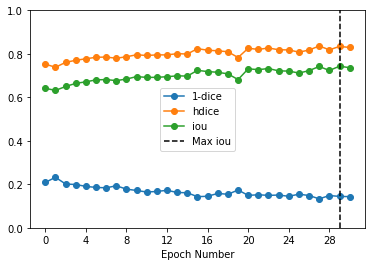

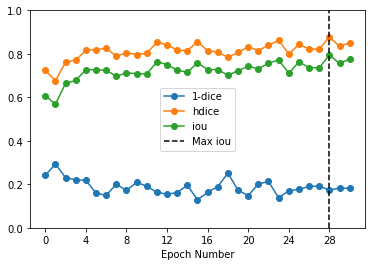

In [0]:
import numpy as np

loaded_metrics_train = np.loadtxt('Project_HLCV_19/code/eval_metrics.txt')
print(loaded_metrics_train.shape)

loaded_metrics_test = np.loadtxt('Project_HLCV_19/code/eval_metrics_test.txt')
print(loaded_metrics_train.shape)

max_iou_test = np.argmax(loaded_metrics_test[:,2])
print(max_iou_test)
max_iou_test_vale = np.max(loaded_metrics_test[:,2])
print(max_iou_test_vale)
max_hdice_test_vale = np.max(loaded_metrics_test[:,1])
print(max_hdice_test_vale)
max_sdice_test_vale = np.min(loaded_metrics_test[:,0])
print(max_sdice_test_vale)

max_iou_train = np.argmax(loaded_metrics_train[:,2])
print(max_iou_train)
max_iou_train_value = np.max(loaded_metrics_train[:,2])
print(max_iou_train_value)
max_hdice_train_value = np.max(loaded_metrics_train[:,1])
print(max_hdice_train_value)
max_sdice_train_value = np.min(loaded_metrics_train[:,0])
print(max_sdice_train_value)

# *****START OF MODIFIED CODE (SELF-ADDED)*****
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure().gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(loaded_metrics_train[:,0], label='1-dice', marker='o')
plt.plot(loaded_metrics_train[:,1], label='hdice', marker='o')
plt.plot(loaded_metrics_train[:,2], label='iou', marker='o')
plt.axvline(x = max_iou_train, color='k', linestyle='--', label='Max iou')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylim((0, 1))
plt.savefig('train_losses.png')
plt.show()

plt.figure().gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(loaded_metrics_test[:,0], label='1-dice', marker='o')
plt.plot(loaded_metrics_test[:,1], label='hdice', marker='o')
plt.plot(loaded_metrics_test[:,2], label='iou', marker='o')
plt.axvline(x = max_iou_test, color='k', linestyle='--', label='Max iou')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylim((0, 1))
plt.savefig('test_losses.png')
plt.show()


# plt.figure().gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.plot(train_accuracies, label='Train Accuracies', marker='o')
# plt.plot(val_accuracies, label='Validation Accuracies', marker='o')
# plt.axvline(x = early_stopping, color='k', linestyle='--', label='Early Stopping')
# plt.legend()
# plt.xlabel('Epoch Number')
# plt.ylim((0, 100))
# plt.savefig('accuracies_without_batch_normalization.png')
# plt.show()
# *****END OF MODIFIED CODE (SELF-ADDED)*****

In [0]:
def vis_imgs2(X, y_, y, path):
    """ show one slice with target """
    if y.ndim == 2:
        y = y[:,:,np.newaxis]
        print("hello")
    if y_.ndim == 2:
        y_ = y_[:,:,np.newaxis]
    assert X.ndim == 3
    tl.vis.save_images(np.asarray([X[:,:,0,np.newaxis],
        X[:,:,1,np.newaxis], X[:,:,2,np.newaxis],
        X[:,:,3,np.newaxis], y_, y]), size=(1, 6),
        image_path=path)
    
def vis_imgs3(y, path):
    """ show one slice with target """
#     if y.ndim == 2:
#         y = y[:,:,np.newaxis]
#         print("hello")
    tl.vis.save_images(np.asarray([y]), size=(1, 1),
        image_path=path)

def extract_features(task="all"):
###======================== TRAINING ================================###
    savefile = "Project_HLCV_19/code/evaluate/log.txt"
    sdice_arr = []
    hdice_arr = []
    iou_arr = []
    
    sdice_arr_test = []
    hdice_arr_test = []
    iou_arr_test = []
    
    tl.files.load_and_assign_npz(sess=sess, name='Project_HLCV_19/code/checkpoint/u_net_{}.npz'.format(task), network=net)
    #maxpool_op = tf.get_collection('conv5_2')
    f = open(savefile, 'w')
    n_epoch = 0
    #graph = tf.get_default_graph()
    #graph = sess.graph.get_operations()
    #output = graph.get_tensor_by_name('conv_5:0')
    #print(graph)
    op = sess.graph.get_operations()
    op_values = [m.values() for m in op]
    print(op_values)
    total_out_conv = []
    #total_out_conv = np.array([]).reshape(1, 60, 60, 256)
    #print(total_out_conv.shape)
#     from pathlib import Path
#     p = Path('Project_HLCV_19/code/evaluate/data_features.npy')
#     with p.open('ab') as temp:
    ###======================== EVALUATION ==========================###
    total_dice, total_iou, total_dice_hard, n_batch = 0, 0, 0, 0
    for batch in tl.iterate.minibatches(inputs=X_train, targets=y_train,
                                    batch_size=batch_size, shuffle=False):
        b_images, b_labels = batch
        _dice, _iou, _diceh, out, out_conv = sess.run([test_dice_loss,
                test_iou_loss, test_dice_hard, net_test.outputs, 'u_net/conv2_2/Relu:0'],
                {t_image: b_images, t_seg: b_labels})

        total_dice += _dice; total_iou += _iou; total_dice_hard += _diceh
        n_batch += 1
        
        
        #total_out_conv = np.concatenate((total_out_conv, out_conv), axis = 1)
        #total_out_conv.append(out_conv)    
        #np.save(temp, out_conv, allow_pickle = False)
        #y = np.load("Project_HLCV_19/code/evaluate/data_features.npy") if os.path.isfile("Project_HLCV_19/code/evaluate/data_features.npy") else [] #get data if exist
        #np.save('Project_HLCV_19/code/evaluate/data_features.npy', np.append(y, out_conv), allow_pickle = False) #save the new
        #np.save('Project_HLCV_19/code/evaluate/features_unconv4_trained/data_features_{}.npy'.format(n_batch), out_conv, allow_pickle = False)
          
    #temp.close()      
    sdice_arr_test.append(total_dice/n_batch)
    hdice_arr_test.append(total_dice_hard/n_batch)
    iou_arr_test.append(total_iou/n_batch)

    f.write(" **"+" "*17+"test 1-dice: %f hard-dice: %f iou: %f (2d no distortion)" % (total_dice/n_batch, 
total_dice_hard/n_batch, total_iou/n_batch))
    print(" **"+" "*17+"test 1-dice: %f hard-dice: %f iou: %f (2d no distortion)" %
            (total_dice/n_batch, total_dice_hard/n_batch, total_iou/n_batch))
    print(" task: {}".format(task))
    #print(out_conv)
    #print(len(total_out_conv))
    #np.save('Project_HLCV_19/code/evaluate/features/data_features.npy', total_out_conv, allow_pickle = False)
    print(out_conv.shape)
    print(out_conv.ndim)
    print(out.shape)
    print(out.ndim)
    ## save a predition of test set
    for i in range(batch_size):
        if np.max(b_images[i]) > 0:
            vis_imgs3(out_conv[i,:,:,-1], "Project_HLCV_19/code/evaluate/samples/{}/train_rembrandt_evaluate_conv2.png".format(task))
            break
        elif i == batch_size-1:
            vis_imgs3(out_conv[i,:,:,-1], "Project_HLCV_19/code/evaluate/samples/{}/train_rembrandt_evaluate_conv2.png".format(task))

    ###======================== SAVE MODEL ==========================###
    #tl.files.save_npz(net.all_params, name='Project_HLCV_19/code/evaluate/checkpoint/u_net_{}.npz'.format(task), sess=sess)
    f.close()
	
#     sdice_arr = np.array(sdice_arr).reshape(n_epoch+1,1)
#     hdice_arr = np.array(hdice_arr).reshape(n_epoch+1,1)
#     iou_arr = np.array(iou_arr).reshape(n_epoch+1,1)

	
#     sdice_arr_test = np.array(sdice_arr_test).reshape(n_epoch+1, 1)
#     hdice_arr_test = np.array(hdice_arr_test).reshape(n_epoch+1, 1)
#     iou_arr_test = np.array(iou_arr_test).reshape(n_epoch+1, 1)

#     eval_metrics = np.concatenate((sdice_arr, hdice_arr, iou_arr), axis = 1)
#     eval_metrics_test = np.concatenate((sdice_arr_test, hdice_arr_test, iou_arr_test), axis = 1)
    
#     np.savetxt("Project_HLCV_19/code/evaluate/eval_metrics.txt", eval_metrics)
#     np.savetxt("Project_HLCV_19/code/evaluate/eval_metrics_test.txt", eval_metrics_test)
	
extract_features()

[(<tf.Tensor 'input_image:0' shape=(10, 240, 240, 4) dtype=float32>,), (<tf.Tensor 'target_segment:0' shape=(10, 240, 240, 1) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/shape:0' shape=(4,) dtype=int32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/mean:0' shape=() dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/stddev:0' shape=() dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/TruncatedNormal:0' shape=(3, 3, 4, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/mul:0' shape=(3, 3, 4, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal:0' shape=(3, 3, 4, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel:0' shape=(3, 3, 4, 64) dtype=float32_ref>,), (<tf.Tensor 'u_net/conv1_1/kernel/Assign:0' shape=(3, 3, 4, 64) dtype=float32_ref>,), (<tf.Tensor 'u_net/conv1_1/kernel/read:0' shape=(3, 3, 4, 64) 

In [0]:
import tensorlayer as tl
import numpy as np
import os, csv, random, gc, pickle
import nibabel as nib
import sys

"""
In seg file
--------------
Label 1: necrotic and non-enhancing tumor
Label 2: edema 
Label 4: enhancing tumor
Label 0: background

MRI
-------
whole/complete tumor: 1 2 4
core: 1 4
enhance: 4
"""
###============================= SETTINGS ===================================###
DATA_SIZE = 'all' # (small, half or all)

save_dir = "Project_HLCV_19/code/train_dev_all/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

HGG_data_path = "REMBRANDT_Annotated/HGG"
LGG_data_path = "REMBRANDT_Annotated/LGG"
survival_csv_path = "REMBRANDT_Annotated/survival_data.csv"
survival_csv_tumor_path = "REMBRANDT_Annotated/survival_data_tumor.csv"
###==========================================================================###

survival_id_list = []
survival_age_list =[]
survival_peroid_list = []
survival_tumor_list = []

with open(survival_csv_path, 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for idx, content in enumerate(reader):
        survival_id_list.append(content[0])
        survival_age_list.append(float(content[1]))
        survival_peroid_list.append(float(content[2]))
     
with open(survival_csv_tumor_path, 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for idx, content in enumerate(reader):
        #survival_id_list.append(content[0])
        temp = content[0].replace("_", "-")
        #print(temp)
        if temp in survival_id_list:
          #print(temp)
          #print(content[4])
          #survival_tumor_name_list.append(content[4])
          if content[4].strip() == "GBM" or content[5].strip() == "III":
            #print("hello")        
            survival_tumor_list.append(1)
          else:
            survival_tumor_list.append(0)
        
survival_tumor_list.append(1) # For patient with ID HF0652.4
        
print(len(survival_id_list)) #163
print(len(survival_tumor_list))
print(survival_tumor_list)
#print(survival_id_list)  

# Remove other options (half and small) for Rembrandt
HGG_path_list = tl.files.load_folder_list(path=HGG_data_path)
LGG_path_list = tl.files.load_folder_list(path=LGG_data_path)
print(len(HGG_path_list), len(LGG_path_list)) #210 #75

HGG_name_list = [os.path.basename(p) for p in HGG_path_list]
LGG_name_list = [os.path.basename(p) for p in LGG_path_list]

survival_id_from_HGG = []
survival_id_from_LGG = []

survival_tumor_from_HGG = []
survival_tumor_from_LGG = []

for i in survival_id_list:
    if i in HGG_name_list:
        survival_id_from_HGG.append(i)
        #survival_tumor_from_HGG.append(1)
    elif i in LGG_name_list:
        survival_id_from_LGG.append(i)
        #survival_tumor_from_LGG(0)
    else:
        print(i)

print(len(survival_id_from_HGG), len(survival_id_from_LGG)) #61 and 40
print(survival_id_from_HGG)
print(survival_id_from_LGG)
print(len(survival_tumor_from_HGG), len(survival_tumor_from_LGG)) #61 and 40
# Pick 54 out of 62 and 36 out of 40 (We will have 90 training and 12 test
#index_HGG = list(range(0, len(survival_id_from_HGG)))
#index_LGG = list(range(0, len(LGG_name_list)))
index_HGG = range(len(survival_id_from_HGG))
index_LGG = range(len(survival_id_from_LGG))

# Training and testing split
#tr_index_HGG = random.sample(index_HGG, 54)
#tr_index_LGG = random.sample(index_LGG, 36)
tr_index_HGG = range(54)
tr_index_LGG = range(36)
dev_index_HGG = [i for i in index_HGG if i not in tr_index_HGG]
dev_index_LGG = [i for i in index_LGG if i not in tr_index_LGG]

# print(tr_index_HGG)
# print(dev_index_HGG)
# print(tr_index_LGG)
# print(dev_index_LGG)

survival_id_dev_HGG = [survival_id_from_HGG[i] for i in dev_index_HGG]
survival_id_tr_HGG = [survival_id_from_HGG[i] for i in tr_index_HGG]

survival_id_dev_LGG = [LGG_name_list[i] for i in dev_index_LGG]
survival_id_tr_LGG = [LGG_name_list[i] for i in tr_index_LGG]

survival_tumor_dev_HGG = [survival_tumor_list[survival_id_list.index(i)] for i in survival_id_dev_HGG]
survival_tumor_tr_HGG = [survival_tumor_list[survival_id_list.index(i)] for i in survival_id_tr_HGG]

survival_tumor_dev_LGG = [survival_tumor_list[survival_id_list.index(i)] for i in survival_id_dev_LGG]
survival_tumor_tr_LGG = [survival_tumor_list[survival_id_list.index(i)] for i in survival_id_tr_LGG]

survival_age_dev = [survival_age_list[survival_id_list.index(i)] for i in survival_id_dev_HGG]
survival_age_tr = [survival_age_list[survival_id_list.index(i)] for i in survival_id_tr_HGG]

survival_period_dev = [survival_peroid_list[survival_id_list.index(i)] for i in survival_id_dev_HGG]
survival_period_tr = [survival_peroid_list[survival_id_list.index(i)] for i in survival_id_tr_HGG]

print(survival_tumor_dev_HGG)
print(survival_tumor_tr_HGG)

print(survival_tumor_dev_LGG)
print(survival_tumor_tr_LGG)

data_types = ['1', '2', '3', '4']
data_types_mean_std_dict = {i: {'mean': 0.0, 'std': 1.0} for i in data_types}

# calculate mean and std for all data types

#==================== LOAD ALL IMAGES' PATH AND COMPUTE MEAN/ STD
for i in data_types:
    data_temp_list = []
    for j in HGG_name_list:
        img_path = os.path.join(HGG_data_path, j, j + '.nii.gz')
        img = nib.load(img_path).get_data()
        if(img.shape[0] == 256):
            print(img.shape)
            print(j)
        data_temp_list.append(img)

    for j in LGG_name_list:
        img_path = os.path.join(LGG_data_path, j, j + '.nii.gz')
        img = nib.load(img_path).get_data()
        if(img.shape[0] == 256):
            print(img.shape)
            print(j)
        data_temp_list.append(img)

    data_temp_list = np.concatenate(data_temp_list, axis = 2)	
    # data_temp_list = np.asarray(data_temp_list)
    m = np.mean(data_temp_list)
    s = np.std(data_temp_list)
    data_types_mean_std_dict[i]['mean'] = m
    data_types_mean_std_dict[i]['std'] = s
del data_temp_list
print(data_types_mean_std_dict)

with open(save_dir + 'mean_std_dict.pickle', 'wb') as f:
    pickle.dump(data_types_mean_std_dict, f, protocol=4)


##==================== GET NORMALIZE IMAGES
X_train_input = []
X_train_target = []

X_dev_input = []
X_dev_target = []


print(" HGG Validation")
for i in survival_id_dev_HGG:
    all_3d_data = []
    for j in data_types:
      
        # img_path = os.path.join(HGG_data_path, i, i + '_' + j + '.nii.gz')
        img_path = os.path.join(HGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)
    #print(all_3d_data[0].shape)
#     seg_path = os.path.join(HGG_data_path, i, i + '_seg.nii.gz')
#     seg_img = nib.load(seg_path).get_data()
#     seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_dev_input.append(combined_array)

#         seg_2d = seg_img[:, :, j]
#         seg_2d.astype(int)
        X_dev_target.append(1)
    del all_3d_data
    gc.collect()
    print("finished {}".format(i))

print(" LGG Validation")
for i in survival_id_dev_LGG:
    all_3d_data = []
    for j in data_types:
      
        img_path = os.path.join(LGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

#     seg_path = os.path.join(LGG_data_path, i, i + '_seg.nii.gz')
#     seg_img = nib.load(seg_path).get_data()
#     seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_dev_input.append(combined_array)

#         seg_2d = seg_img[:, :, j]
#         seg_2d.astype(int)
        X_dev_target.append(0)
    del all_3d_data
    gc.collect()
    print("finished {}".format(i))

X_dev_input = np.asarray(X_dev_input, dtype=np.float32)
X_dev_target = np.asarray(X_dev_target)#, dtype=np.float32)

print(" HGG Train")
for i in survival_id_tr_HGG:
    all_3d_data = []
    for j in data_types:
      
        img_path = os.path.join(HGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

#     seg_path = os.path.join(HGG_data_path, i, i + '_seg.nii.gz')
#     seg_img = nib.load(seg_path).get_data()
#     seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_train_input.append(combined_array)

#         seg_2d = seg_img[:, :, j]
#         seg_2d.astype(int)
        X_train_target.append(1)
    del all_3d_data
    print("finished {}".format(i))


print(" LGG Train")
for i in survival_id_tr_LGG:
    all_3d_data = []
    for j in data_types:
      
        img_path = os.path.join(LGG_data_path, i, i + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)
    #print(len(all_3d_data))
#     seg_path = os.path.join(LGG_data_path, i, i + '_seg.nii.gz')
#     seg_img = nib.load(seg_path).get_data()
#     seg_img = np.transpose(seg_img, (1, 0, 2))
    #print(all_3d_data[0].shape[2])
    #print(all_3d_data[0][:, :, 0])
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        #combined_array = all_3d_data[0][:, :, j]
        #combined_array = np.expand_dims(combined_array, axis=2)
        #print(combined_array.shape)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        #print(combined_array.shape)
        combined_array.astype(np.float32)
        X_train_input.append(combined_array)

#         seg_2d = seg_img[:, :, j]
#         seg_2d.astype(int)
        X_train_target.append(0)
    del all_3d_data
    print("finished {}".format(i))

X_train_input = X_train_input[:-5]
X_train_input = np.asarray(X_train_input, dtype=np.float32)
print(X_train_input.shape)
print(len(X_train_input))
X_train_target = X_train_target[:-5]

count = 0
for i in range(len(X_train_target)):
  
  if X_train_target[i] == 0:
    break
  count+= 1
print(count)
  
X_train_target = np.asarray(X_train_target)#, dtype=np.float32)
X_train_target = np.expand_dims(X_train_target, axis=1)
print(X_train_target.shape)
print(len(X_train_target))
#np.save('Project_HLCV_19/code/evaluate/targets_conv5_trained/data_targets.npy', X_train_target, allow_pickle = False)

X_dev_input = X_dev_input[:-7]
X_dev_input = np.asarray(X_dev_input, dtype=np.float32)
print(X_dev_input.shape)
print(len(X_dev_input))
X_dev_target = X_dev_target[:-7]

count = 0
for i in range(len(X_dev_target)):
  
  if X_dev_target[i] == 0:
    break
  count+= 1
print(count)

X_dev_target = np.asarray(X_dev_target)#, dtype=np.float32)
X_dev_target = np.expand_dims(X_dev_target, axis=1)
print(X_dev_target.shape)
print(len(X_dev_target))
#np.save('Project_HLCV_19/code/evaluate/targets_conv5_trained/test_targets.npy', X_dev_target, allow_pickle = False)




101
101
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
61 40
61 40
['900-00-5332', '900-00-5308', '900-00-5316', '900-00-5338', '900-00-5339', '900-00-5342', '900-00-5346', '900-00-5381', '900-00-5384', '900-00-5385', '900-00-5393', '900-00-5396', '900-00-5404', '900-00-5413', '900-00-5414', '900-00-5445', '900-00-5459', '900-00-5462', '900-00-5299', '900-00-5303', 'HF0828', 'HF0986', 'HF0990', 'HF1032', 'HF1057', 'HF1058', 'HF1071', 'HF1077', 'HF1078', 'HF1097', 'HF1122', 'HF1136', 'HF1137', 'HF1139', 'HF1150', 'HF1185', 'HF1191', 'HF1219', 'HF1242', 'HF1269', 'HF1280', 'HF1292', 'HF1297', 'HF1357', 'HF1397', 'HF1398', 'HF1409', 'HF1458', 'HF1475', 'HF1490', 'HF1502', 'HF1517', 'HF1538', 'HF1540', 'HF1560', 'HF1587', 'HF1613', 'HF16

In [0]:
import os
os.chdir('/content/drive/My Drive/HLCV 19/Project/')
!ls
#!tar -xvf REMBRANDT_Annotated.tar.gz

Backup_Initial	 REMBRANDT_Annotated	     test_losses.png
Project_HLCV_18  REMBRANDT_Annotated.tar.gz  train_losses.png
Project_HLCV_19  Rembrand.tar.gz


In [0]:
import tensorflow as tf
import tensorlayer as tl
from tensorlayer.layers import *
import numpy as np
#from tensorflow.layers import *


from tensorlayer.layers import *
def u_net(x, is_train=False, reuse=False, n_out=1):
    _, nx, ny, nz = x.get_shape().as_list()
    with tf.variable_scope("u_net", reuse=reuse):
        tl.layers.set_name_reuse(reuse)
        inputs = InputLayer(x, name='inputs')
        #inputs = InputLayer(x)
        conv1 = Conv2d(inputs, 64, (3, 3), act=tf.nn.relu, name='conv1_1')
        conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='conv1_2')
        pool1 = MaxPool2d(conv1, (2, 2), name='pool1')
        conv2 = Conv2d(pool1, 128, (3, 3), act=tf.nn.relu, name='conv2_1')
        conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='conv2_2')
        pool2 = MaxPool2d(conv2, (2, 2), name='pool2')
        conv3 = Conv2d(pool2, 128, (3, 3), act=tf.nn.relu, name='conv3_1')
        conv3 = Conv2d(conv3, 128, (3, 3), act=tf.nn.relu, name='conv3_2')
        pool3 = MaxPool2d(conv3, (2, 2), name='pool3')
        flatten = FlattenLayer(pool3, name='flatten')
        dense1 = DenseLayer(flatten, n_units=2048, act=tf.nn.relu, name='dense1')
        dense2 = DenseLayer(dense1, n_units=1, act=tf.nn.sigmoid, name='dense2')
        #conv5 = tf.identity(conv5,name="conv_5")

    return dense2
  
# def u_net(x, is_train=False, reuse=False, n_out=1):
#     _, nx, ny, nz = x.get_shape().as_list()
#     with tf.variable_scope("u_net", reuse=reuse):
#         tl.layers.set_name_reuse(reuse)
#         inputs = InputLayer(x, name='inputs')
#         #inputs = InputLayer(x)
#         conv1 = Conv2d(inputs, 64, (3, 3), act=tf.nn.relu, name='conv1_1')
#         conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='conv1_2')
#         pool1 = MaxPool2d(conv1, (2, 2), name='pool1')
#         conv2 = Conv2d(pool1, 128, (3, 3), act=tf.nn.relu, name='conv2_1')
#         conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='conv2_2')
#         #pool2 = MaxPool2d(conv2, (2, 2), name='pool2')
#         flatten = flatten_reshape(conv2, name='flatten')
#         dense1 = Dense(2048, act=tf.nn.relu, in_channels=flatten, name=None)
#         dense2 = Dense(1, act=tf.nn.sigmoid, in_channels=dense1, name=None)
#         #conv5 = tf.identity(conv5,name="conv_5")

#     return dense2
 

W0721 14:19:04.743424 140411141531520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/core.py:39: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0721 14:19:04.803929 140411141531520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/pooling.py:66: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
# test = np.load('Project_HLCV_19/code/evaluate/features/data_features.npy', allow_pickle = False)
# print(test)
# print(test.shape)
train_features = []
for i in range(1, 455):
  test = np.load('Project_HLCV_19/code/evaluate/features_conv5_trained/data_features_{}.npy'.format(i), allow_pickle = False)
  train_features.append(test)
  
train_features = np.asarray(train_features)
print(train_features.shape)
train_features = train_features.reshape(-1, *train_features.shape[-3:])
print(train_features.shape)

(454, 10, 15, 15, 1024)
(4540, 15, 15, 1024)


In [0]:
# test = np.load('Project_HLCV_19/code/evaluate/features/data_features.npy', allow_pickle = False)
# print(test)
# print(test.shape)
test_features = []
for i in range(1, 58):
  test = np.load('Project_HLCV_19/code/evaluate/features_unconv4_trained/test_features_{}.npy'.format(i), allow_pickle = False)
  test_features.append(test)
  
test_features = np.asarray(test_features)
print(test_features.shape)
test_features = test_features.reshape(-1, *test_features.shape[-3:])
print(test_features.shape)

(57, 10, 30, 30, 512)
(570, 30, 30, 512)


In [0]:
train_targets = np.load('Project_HLCV_19/code/evaluate/targets_conv5_trained/data_targets.npy', allow_pickle = False)
print(train_targets)
print(train_targets.shape)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
(4540, 1)


In [0]:
test_targets = np.load('Project_HLCV_19/code/evaluate/targets_conv5_trained/test_targets.npy', allow_pickle = False)
#print(test_targets)
print(test_targets.shape)

(570, 1)


In [0]:
#! /usr/bin/python
# -*- coding: utf8 -*-

import tensorflow as tf
import tensorlayer as tl
import numpy as np
import os, time
import sys

#tf.compat.v1.disable_eager_execution()
#tf.disable_eager_execution()

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

task='all'
## Create folder to save trained model and result images
#save_dir = "Project_HLCV_19/checkpoint"
#tl.files.exists_or_mkdir(save_dir)
#tl.files.exists_or_mkdir("Project_HLCV_19/code/samples/{}".format(task))

###======================== LOAD DATA ===================================###
## by importing this, you can load a training set and a validation set.
# you will get X_train_input, X_train_target, X_dev_input and X_dev_target
# there are 4 labels in targets:
# Label 0: background
# Label 1: necrotic and non-enhancing tumor
# Label 2: edema
# Label 4: enhancing tumor

X_train = train_features
y_train = train_targets
X_test = test_features
y_test = test_targets



###======================== HYPER-PARAMETERS ============================###
batch_size = 10
lr = 0.001 
# lr_decay = 0.5
# decay_every = 100
beta1 = 0.9
n_epoch = 20
print_freq_step = 100

###======================== SHOW DATA ===================================###
# show one slice
X = np.asarray(X_train[80])
y = np.asarray(y_train[80])
print(X.shape, X.min(), X.max()) # (240, 240, 4) -0.380588 2.62761
print(y.shape, y.min(), y.max()) # (240, 240, 1) 0 1
print(X_train.shape)
print(X_test.shape)
nw, nh, nz = X.shape
#vis_imgs(X, y, 'Project_HLCV_19/code/samples/{}/_train_im.png'.format(task))
# show data augumentation results

#lr = 0.001

with tf.device('/cpu:0'):
    sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
    with tf.device('/gpu:0'): #<- remove it if you train on CPU or other GPU
        ###======================== DEFIINE MODEL =======================###
        ## nz is 4 as we input all Flair, T1, T1c and T2.
        t_image = tf.placeholder('float32', [batch_size, nw, nh, nz], name='input_image')
        ## labels are either 0 or 1
        t_seg = tf.placeholder('float32', [batch_size, 1], name='target_segment')
        ## train inference
        net = u_net(t_image, is_train=True, reuse=False, n_out=1)
        ## test inference
        net_test = u_net(t_image, is_train=False, reuse=True, n_out=1)
        

        ###======================== DEFINE LOSS =========================###
        ## train losses
        
        out_seg = net.outputs
        sigmoid_cross_entropy_loss = tl.cost.binary_cross_entropy(out_seg, t_seg, name=None)
        loss = sigmoid_cross_entropy_loss
        
        predicted_train = out_seg
        correct_pred_train = tf.equal(tf.round(predicted_train), t_seg)
        accuracy_train = tf.reduce_mean(tf.cast(correct_pred_train, tf.float32))
        
        #class_wise_train_accuracy = tf.metrics.mean_per_class_accuracy(t_seg, out_seg, 2)
        
#         out_seg = net.outputs
#         dice_loss = 1 - tl.cost.dice_coe(out_seg, t_seg, axis=[0,1,2,3])#, 'jaccard', epsilon=1e-5)
#         iou_loss = tl.cost.iou_coe(out_seg, t_seg, axis=[0,1,2,3])
#         dice_hard = tl.cost.dice_hard_coe(out_seg, t_seg, axis=[0,1,2,3])
#         loss = dice_loss

        ## test losses
        test_out_seg = net_test.outputs
        test_sigmoid_cross_entropy_loss = tl.cost.binary_cross_entropy(test_out_seg, t_seg, name=None)
  
#         test_out_seg = net_test.outputs
#         test_dice_loss = 1 - tl.cost.dice_coe(test_out_seg, t_seg, axis=[0,1,2,3])#, 'jaccard', epsilon=1e-5)
#         test_iou_loss = tl.cost.iou_coe(test_out_seg, t_seg, axis=[0,1,2,3])
#         test_dice_hard = tl.cost.dice_hard_coe(test_out_seg, t_seg, axis=[0,1,2,3])

        predicted_test = test_out_seg
        correct_pred_test = tf.equal(tf.round(predicted_test), t_seg)
        accuracy_test = tf.reduce_mean(tf.cast(correct_pred_test, tf.float32))
      
        #class_wise_test_accuracy = tf.metrics.mean_per_class_accuracy(t_seg, test_out_seg, 2)

    ###======================== DEFINE TRAIN OPTS =======================###
    t_vars = tl.layers.get_variables_with_name('u_net', True, True)
    with tf.device('/gpu:0'):
        with tf.variable_scope('learning_rate'):
            lr_v = tf.Variable(lr, trainable=False)
        train_op = tf.train.AdamOptimizer(lr_v, beta1=beta1).minimize(loss, var_list=t_vars)

    ###======================== LOAD MODEL ==============================###
    tl.layers.initialize_global_variables(sess)
    ## load existing model if possible
    #tl.files.load_and_assign_npz(sess=sess, name=save_dir+'/u_net_{}.npz'.format(task), network=net)
    #temp_model = tl.files.load_npz(path=save_dir+'/', name='u_net_{}.npz'.format(task))
    #print(temp_model)
    


NameError: ignored

In [0]:
def train(task="all"):
###======================== TRAINING ================================###
    #savefile = "Project_HLCV_19/code/log.txt"
    sdice_arr = []
    hdice_arr = []
    iou_arr = []
    
    sdice_arr_test = []
    hdice_arr_test = []
    iou_arr_test = []
    
    #lr = 0.001
    #f = open(savefile, 'w')
    n_epoch = 20
    
    op = sess.graph.get_operations()
    op_values = [m.values() for m in op]
    print(op_values)
    
    for epoch in range(0, n_epoch+1):
        epoch_time = time.time()
        ## update decay learning rate at the beginning of a epoch
        # if epoch !=0 and (epoch % decay_every == 0):
        #     new_lr_decay = lr_decay ** (epoch // decay_every)
        #     sess.run(tf.assign(lr_v, lr * new_lr_decay))
        #     log = " ** new learning rate: %f" % (lr * new_lr_decay)
        #     print(log)
        # elif epoch == 0:
        #     sess.run(tf.assign(lr_v, lr))
        #     log = " ** init lr: %f  decay_every_epoch: %d, lr_decay: %f" % (lr, decay_every, lr_decay)
        #     print(log)
        steps_count = 0
        total_sigmoid_loss, total_train_acc, n_batch = 0, 0, 0
        for batch in tl.iterate.minibatches(inputs=X_train, targets=y_train,
                                    batch_size=batch_size, shuffle=True):
            images, labels = batch
            step_time = time.time()
            ## data augumentation for a batch of Flair, T1, T1c, T2 images
            # and label maps synchronously.
#             data = tl.prepro.threading_data([_ for _ in zip(images[:,:,:,0, np.newaxis],
#                     images[:,:,:,1, np.newaxis], images[:,:,:,2, np.newaxis],
#                     images[:,:,:,3, np.newaxis], labels)],
#                     fn=distort_imgs) # (10, 5, 240, 240, 1)
            #b_images = data[:,0:1,:,:,:]  # (10, 4, 240, 240, 1)
            #print(b_images.shape)
#             b_images = data[:,0:4,:,:,:]  # (10, 4, 240, 240, 1)
#             b_labels = data[:,4,:,:,:]
#             b_images = b_images.transpose((0,2,3,1,4))
            b_images = images
            b_images.shape = (batch_size, nw, nh, nz)
            b_labels = labels
            #print("start, step no. ", steps_count)
            #print(b_images.shape)
            ## update network
            _, _sigmoid_loss, out, out_dense_1, acc = sess.run([train_op,
                    sigmoid_cross_entropy_loss, net.outputs, 'u_net/dense1/b/Adam_1/read:0', accuracy_train],
                    {t_image: b_images, t_seg: b_labels})
            total_sigmoid_loss += _sigmoid_loss
            n_batch += 1
            #print("Class-Wise-Accuracy: ", class_acc)
            total_train_acc += acc
            
            #print("end, step no. ", steps_count)
            #steps_count = steps_count + 1
            ## you can show the predition here:
            # vis_imgs2(b_images[0], b_labels[0], out[0], "samples/{}/_tmp.png".format(task))
            # exit()
            
            # if _dice == 1: # DEBUG
            #     print("DEBUG")
            #     vis_imgs2(b_images[0], b_labels[0], out[0], "samples/{}/_debug.png".format(task))

            if n_batch % print_freq_step == 0:
                print("Epoch %d step %d sigmoid loss: %f took %fs (2d with distortion)"
                % (epoch, n_batch, _sigmoid_loss, time.time()-step_time))

            ## check model fail
            if np.isnan(_sigmoid_loss):
                exit(" ** NaN loss found during training, stop training")
            if np.isnan(out).any():
                exit(" ** NaN found in output images during training, stop training")

#         sdice_arr.append(total_dice/n_batch)
#         hdice_arr.append(total_dice_hard/n_batch)
#         iou_arr.append(total_iou/n_batch)
        #f.write(" ** Epoch [%d/%d] train 1-dice: %f took %fs (2d with distortion)" %(epoch, n_epoch, 
        #total_dice/n_batch, time.time()-epoch_time))
        print(" ** Epoch [%d/%d] train sigmoid loss: %f took %fs (2d with distortion)" %
                (epoch, n_epoch, total_sigmoid_loss/n_batch, time.time()-epoch_time))
        print(out_dense_1.shape)
        #print(out_dense_1)
        ## save a predition of training set
       
        print('Train Accuracy: ', total_train_acc/n_batch)
        ###======================== EVALUATION ==========================###
        total_sigmoid_loss, total_test_acc, n_batch = 0, 0, 0
        for batch in tl.iterate.minibatches(inputs=X_test, targets=y_test,
                                        batch_size=batch_size, shuffle=True):
            b_images, b_labels = batch
            _sigmoid_loss, out, out_dense_1, acc = sess.run([test_sigmoid_cross_entropy_loss,
                     net_test.outputs, 'u_net/dense1/b/Adam_1/read:0', accuracy_test],
                    {t_image: b_images, t_seg: b_labels})
            total_sigmoid_loss += _sigmoid_loss
            #print(b_labels)
            #print(out)
            total_test_acc += acc
            n_batch += 1
		        
#         sdice_arr_test.append(total_dice/n_batch)
#         hdice_arr_test.append(total_dice_hard/n_batch)
#         iou_arr_test.append(total_iou/n_batch)
		    #print(out_dense_1.shape)
        #f.write(" **"+" "*17+"test 1-dice: %f (2d no distortion)" % (total_dice/n_batch))
        print(" **"+" "*13+"test sigmoid loss: %f (2d no distortion)" %
                (total_sigmoid_loss/n_batch))
        #print(" task: {}".format(task))
        
        ## save a predition of test set
        print('Test Accuracy: ', total_test_acc/n_batch)
        ###======================== SAVE MODEL ==========================###
        tl.files.save_npz(net.all_params, name='Project_HLCV_19/acgan/checkpoint/u_net_conv3_{}.npz'.format(task), sess=sess)
        #np.save('Project_HLCV_19/code/features/data_features_epoch_{}.npy'.format(epoch), out_conv, allow_pickle = False)
        
#         class_correct = list(0. for i in range(2))
#         class_total = list(0. for i in range(2))
#         classes=[0,1]
#         print(out)
#         for i in range(batch_size):       
#           label = b_labels[i]
#           class_correct[label] += out[i]
#           class_total[label] += 1

#         for i in range(2):
#             if class_total[i] > 0:
#                 print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
#                     classes[i], 100 * class_correct[i] / class_total[i],
#                     np.sum(class_correct[i]), np.sum(class_total[i])))
#             else:
#                 print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
#     f.close()
	
#     sdice_arr = np.array(sdice_arr).reshape(n_epoch+1,1)
#     hdice_arr = np.array(hdice_arr).reshape(n_epoch+1,1)
#     iou_arr = np.array(iou_arr).reshape(n_epoch+1,1)

	
#     sdice_arr_test = np.array(sdice_arr_test).reshape(n_epoch+1, 1)
#     hdice_arr_test = np.array(hdice_arr_test).reshape(n_epoch+1, 1)
#     iou_arr_test = np.array(iou_arr_test).reshape(n_epoch+1, 1)

#     eval_metrics = np.concatenate((sdice_arr, hdice_arr, iou_arr), axis = 1)
#     eval_metrics_test = np.concatenate((sdice_arr_test, hdice_arr_test, iou_arr_test), axis = 1)
    
#     np.savetxt("Project_HLCV_19/code/eval_metrics.txt", eval_metrics)
#     np.savetxt("Project_HLCV_19/code/eval_metrics_test.txt", eval_metrics_test)
	
train()

[(<tf.Tensor 'input_image:0' shape=(10, 15, 15, 1024) dtype=float32>,), (<tf.Tensor 'target_segment:0' shape=(10, 1) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/shape:0' shape=(4,) dtype=int32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/mean:0' shape=() dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/stddev:0' shape=() dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/TruncatedNormal:0' shape=(3, 3, 1024, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/mul:0' shape=(3, 3, 1024, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal:0' shape=(3, 3, 1024, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel:0' shape=(3, 3, 1024, 64) dtype=float32_ref>,), (<tf.Tensor 'u_net/conv1_1/kernel/Assign:0' shape=(3, 3, 1024, 64) dtype=float32_ref>,), (<tf.Tensor 'u_net/conv1_1/kernel/read:0' shape=(3, 3, 1

In [0]:
def extract_features(task="all"):
###======================== TRAINING ================================###
    #savefile = "Project_HLCV_19/code/evaluate/log.txt"
    sdice_arr = []
    hdice_arr = []
    iou_arr = []
    
    sdice_arr_test = []
    hdice_arr_test = []
    iou_arr_test = []
    
    tl.files.load_and_assign_npz(sess=sess, name='Project_HLCV_19/acgan/checkpoint/u_net_conv3_{}.npz'.format(task), network=net)
    #maxpool_op = tf.get_collection('conv5_2')
    #f = open(savefile, 'w')
    n_epoch = 0
    #graph = tf.get_default_graph()
    #graph = sess.graph.get_operations()
    #output = graph.get_tensor_by_name('conv_5:0')
    #print(graph)
    op = sess.graph.get_operations()
    op_values = [m.values() for m in op]
    print(op_values)
    total_out_conv = []
    #total_out_conv = np.array([]).reshape(1, 60, 60, 256)
    #print(total_out_conv.shape)
#     from pathlib import Path
#     p = Path('Project_HLCV_19/code/evaluate/data_features.npy')
#     with p.open('ab') as temp:
    ###======================== EVALUATION ==========================###
    total_sigmoid_loss, n_batch = 0, 0
    for batch in tl.iterate.minibatches(inputs=X_test, targets=y_test,
                                    batch_size=batch_size, shuffle=True):
        b_images, b_labels = batch
        _test_sigmoid_loss, out, out_conv = sess.run([test_sigmoid_cross_entropy_loss,
                net_test.outputs, 'u_net/conv3_2/Relu:0'],
                {t_image: b_images, t_seg: b_labels})
        #print(out_conv.shape)
        #print(X_test.shape)
        #print(b_images.shape)
        total_sigmoid_loss += _test_sigmoid_loss
        n_batch += 1
        #total_out_conv = np.concatenate((total_out_conv, out_conv), axis = 1)
        #total_out_conv.append(out_conv)    
        #np.save(temp, out_conv, allow_pickle = False)
        #y = np.load("Project_HLCV_19/code/evaluate/data_features.npy") if os.path.isfile("Project_HLCV_19/code/evaluate/data_features.npy") else [] #get data if exist
        #np.save('Project_HLCV_19/code/evaluate/data_features.npy', np.append(y, out_conv), allow_pickle = False) #save the new
        np.save('Project_HLCV_19/acgan/features_downsampled_conv3/test_features_{}.npy'.format(n_batch), out_conv, allow_pickle = False)
    print(n_batch)     
    #temp.close()      
#     sdice_arr_test.append(total_dice/n_batch)
#     hdice_arr_test.append(total_dice_hard/n_batch)
#     iou_arr_test.append(total_iou/n_batch)

#     f.write(" **"+" "*17+"test 1-dice: %f hard-dice: %f iou: %f (2d no distortion)" % (total_dice/n_batch, 
# total_dice_hard/n_batch, total_iou/n_batch))
    print(" **"+" "*17+"test 1-dice: %f (2d no distortion)" %
            (total_sigmoid_loss/n_batch))
    print(" task: {}".format(task))
    #print(out_conv)
    #print(len(total_out_conv))
    #np.save('Project_HLCV_19/code/evaluate/features/data_features.npy', total_out_conv, allow_pickle = False)
    
    ## save a predition of test set
   

    ###======================== SAVE MODEL ==========================###
    #tl.files.save_npz(net.all_params, name='Project_HLCV_19/code/evaluate/checkpoint/u_net_{}.npz'.format(task), sess=sess)
    
	
#     sdice_arr = np.array(sdice_arr).reshape(n_epoch+1,1)
#     hdice_arr = np.array(hdice_arr).reshape(n_epoch+1,1)
#     iou_arr = np.array(iou_arr).reshape(n_epoch+1,1)

	
#     sdice_arr_test = np.array(sdice_arr_test).reshape(n_epoch+1, 1)
#     hdice_arr_test = np.array(hdice_arr_test).reshape(n_epoch+1, 1)
#     iou_arr_test = np.array(iou_arr_test).reshape(n_epoch+1, 1)

#     eval_metrics = np.concatenate((sdice_arr, hdice_arr, iou_arr), axis = 1)
#     eval_metrics_test = np.concatenate((sdice_arr_test, hdice_arr_test, iou_arr_test), axis = 1)
    
#     np.savetxt("Project_HLCV_19/code/evaluate/eval_metrics.txt", eval_metrics)
#     np.savetxt("Project_HLCV_19/code/evaluate/eval_metrics_test.txt", eval_metrics_test)
	
extract_features()

[(<tf.Tensor 'input_image:0' shape=(10, 15, 15, 1024) dtype=float32>,), (<tf.Tensor 'target_segment:0' shape=(10, 1) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/shape:0' shape=(4,) dtype=int32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/mean:0' shape=() dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/stddev:0' shape=() dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/TruncatedNormal:0' shape=(3, 3, 1024, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal/mul:0' shape=(3, 3, 1024, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel/Initializer/truncated_normal:0' shape=(3, 3, 1024, 64) dtype=float32>,), (<tf.Tensor 'u_net/conv1_1/kernel:0' shape=(3, 3, 1024, 64) dtype=float32_ref>,), (<tf.Tensor 'u_net/conv1_1/kernel/Assign:0' shape=(3, 3, 1024, 64) dtype=float32_ref>,), (<tf.Tensor 'u_net/conv1_1/kernel/read:0' shape=(3, 3, 1

In [0]:
# test = np.load('Project_HLCV_19/code/evaluate/features/data_features.npy', allow_pickle = False)
# print(test)
# print(test.shape)
train_features = []
for i in range(1, 455):
  test = np.load('Project_HLCV_19/acgan/features_downsampled_conv3/data_features_{}.npy'.format(i), allow_pickle = False)
  train_features.append(test)
  
train_features = np.asarray(train_features)
print(train_features.shape)
train_features = train_features.reshape(-1, *train_features.shape[-3:])
print(train_features.shape)

(454, 10, 4, 4, 128)
(4540, 4, 4, 128)


In [0]:
# test = np.load('Project_HLCV_19/code/evaluate/features/data_features.npy', allow_pickle = False)
# print(test)
# print(test.shape)
test_features = []
for i in range(1, 58):
  test = np.load('Project_HLCV_19/acgan/features_downsampled_conv3/test_features_{}.npy'.format(i), allow_pickle = False)
  #print(test)
  #print(test.shape)
  
  test_features.append(test)
  
test_features = np.asarray(test_features)
print(test_features.shape)
test_features = test_features.reshape(-1, *test_features.shape[-3:])
print(test_features.shape)

(57, 10, 4, 4, 128)
(570, 4, 4, 128)
